In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd


from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm

%matplotlib inline






In [3]:
wine_data = pd.read_csv('wine.data', header = None, sep=',')
wine_data.head()

sample = wine_data.values[:,4]





Для начала визуально предположим класс распределения, для этого построим гистограмму и визуализируем выборку с помощью q-q plot

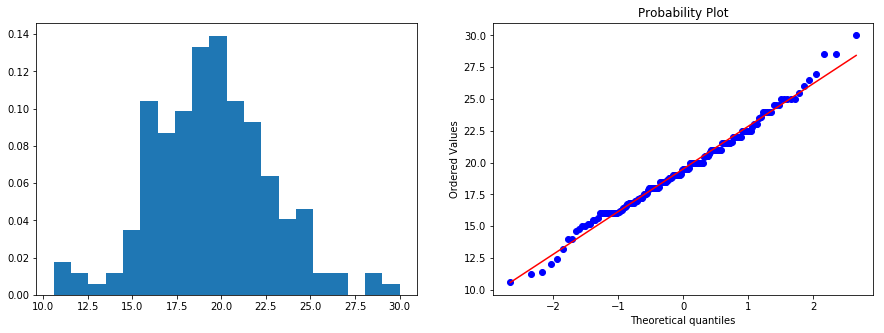

In [4]:
def plot_hist_qq(data, dist="norm", bins=20):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    _ = plt.hist(data, bins=bins, normed=True)
    plt.subplot(122)
    _ = sps.probplot(data, plot=plt, dist=dist)
    
plot_hist_qq(sample)







Визуально гипотеза подтверждается.
Сформулируем теперь 

$H_0:$ Выборка из нормального распределения

$H_1: H_0$ не верна.

Теперь рассмотрим критерий Жарка-Бера и критерий на основе выбочного коэффициента асимметрии

In [5]:
sps.jarque_bera(sample)





(2.7651318991461435, 0.25093384267983709)

In [6]:
sps.skewtest(sample)




SkewtestResult(statistic=1.1833279738240539, pvalue=0.23667919037485952)

In [7]:
sps.shapiro(sample)




(0.9902253746986389, 0.26386943459510803)

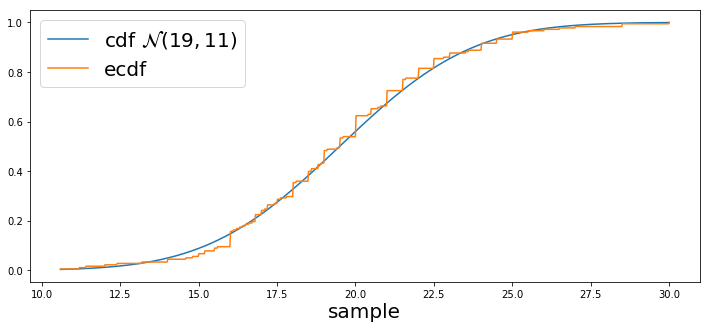

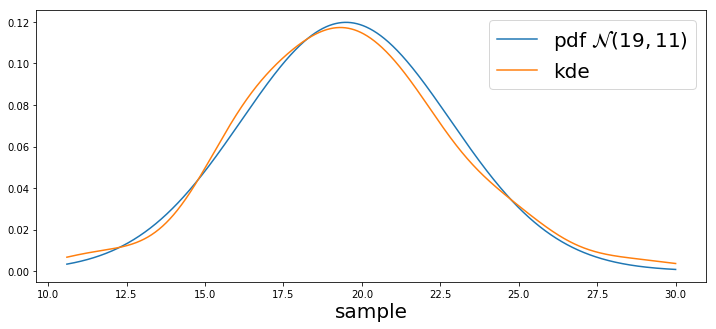

In [8]:
mean = sample.mean()
std = sample.std()
grid = np.linspace(sample.min(), sample.max(), 1000)

plt.figure(figsize=(12, 5))
plt.plot(grid, sps.norm(mean, std).cdf(grid), label='cdf $\mathcal{N}' + '(%d, %d)$' % (mean, std**2))
plt.plot(grid, ECDF(sample)(grid), label='ecdf')
plt.legend(fontsize=20)
plt.xlabel('sample', fontsize=20)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(grid, sps.norm(mean, std).pdf(grid), label='pdf $\mathcal{N}' + '(%d, %d)$' % (mean, std**2))
plt.plot(grid, 
         np.exp(KernelDensity(kernel='gaussian',bandwidth=1.3)
                .fit(sample[:, np.newaxis])
                .score_samples(grid[:, np.newaxis])), 
         label='kde')
plt.legend(fontsize=20)
plt.xlabel('sample', fontsize=20)
plt.show()




Итог: p-value >> 0.05,
выборка принадлежит нормальному распределению